In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy

Importing the dataset

In [2]:
water = pd.read_csv("./water_potability.csv")

Basic dataframe checks

In [3]:
water.shape

(3276, 10)

In [4]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Checking for null values in the dataframe

In [5]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Filling the null values

In [6]:
water['ph']=water['ph'].fillna(water.groupby(['Potability'])['ph'].transform('mean'))
water['Sulfate']=water['Sulfate'].fillna(water.groupby(['Potability'])['Sulfate'].transform('mean'))
water['Trihalomethanes']=water['Trihalomethanes'].fillna(water.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

Finding any values that contains "ph" equal or smaller than zero.

In [7]:
water[water["ph"] <= 0]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3014,0.0,214.846144,49456.587108,7.897539,334.56429,583.448849,7.702328,77.712891,4.92884,0


Dropping the value that has "ph" equal to zero

In [8]:
water.drop(3014, inplace=True)

Checking data destribution and density in the dataframe

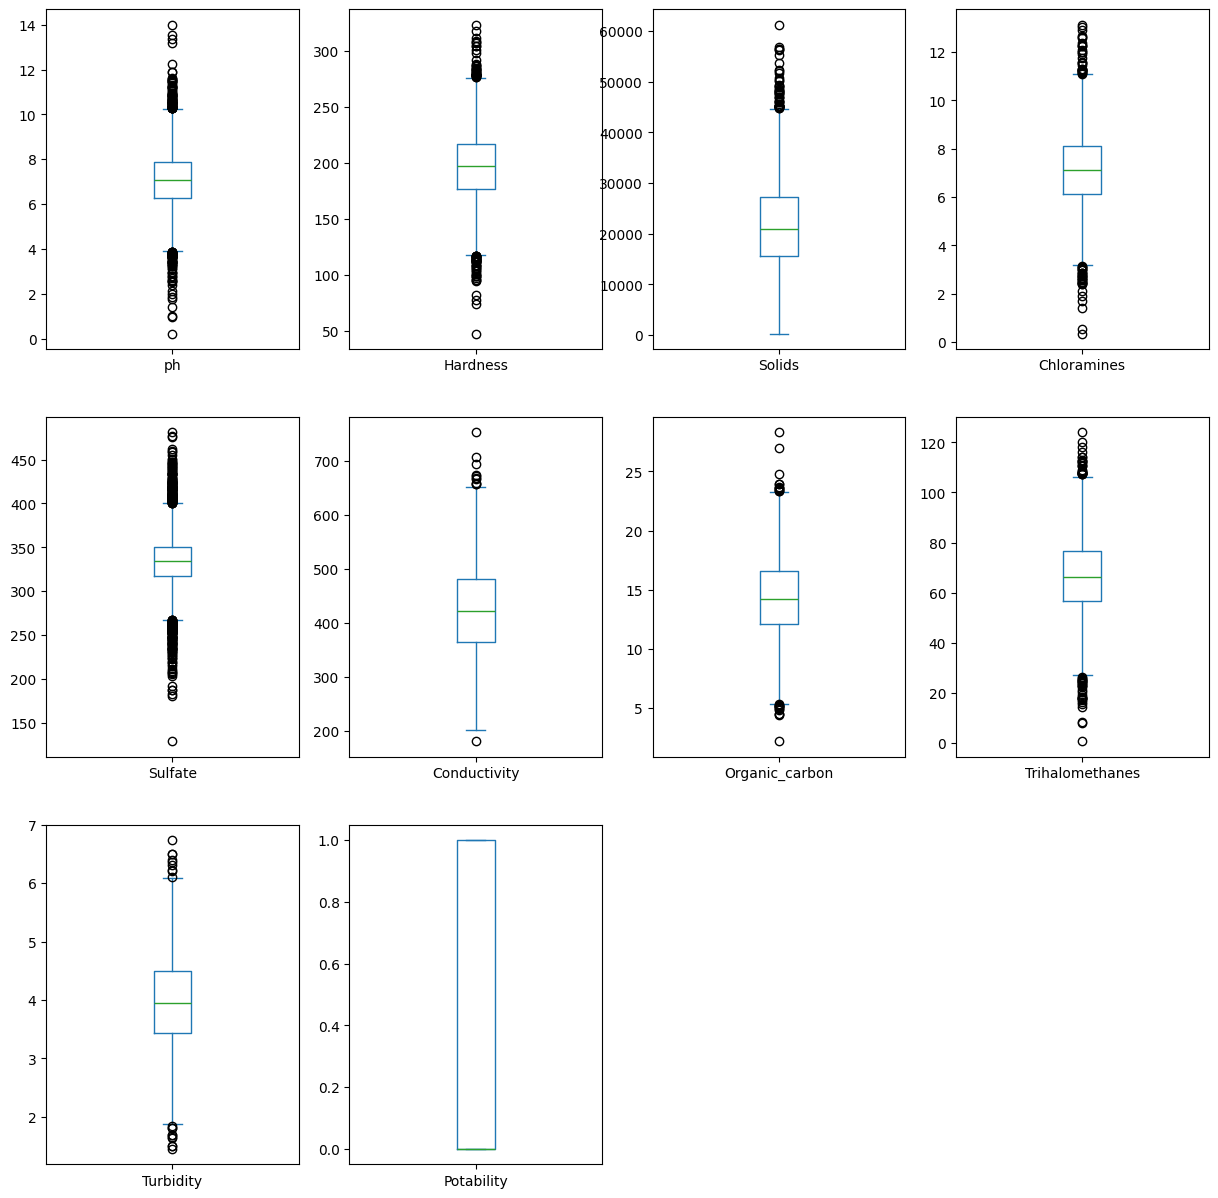

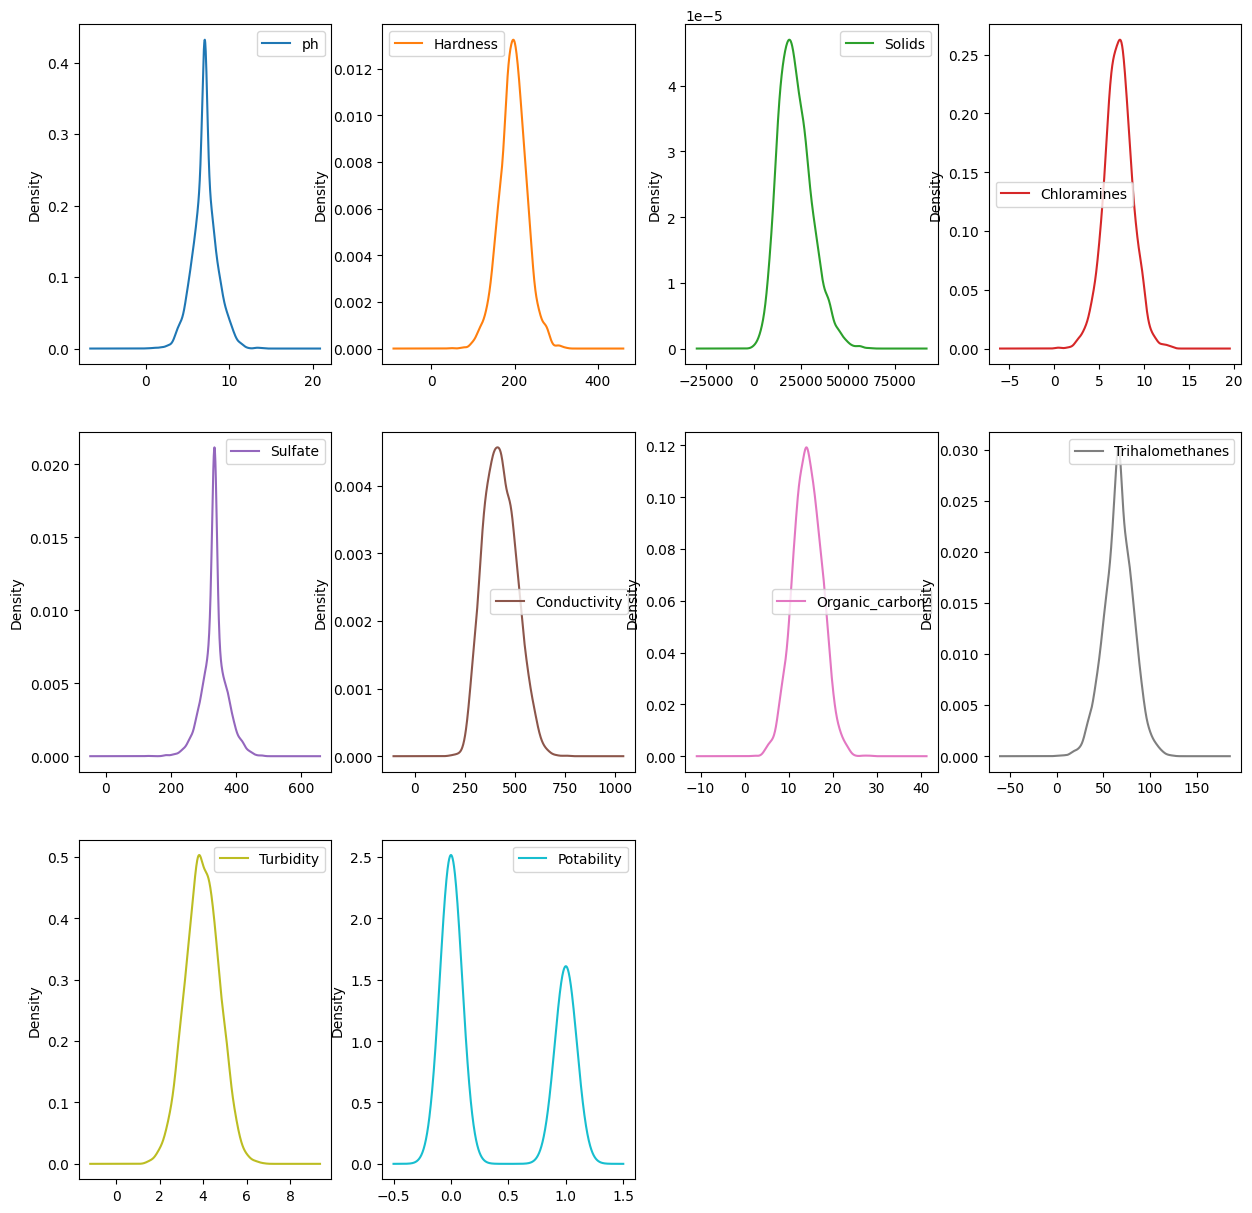

In [9]:
water.plot(kind = "box",
                layout = (3,4),
                subplots = True,
                figsize = (15,15))

water.plot(kind = "density",
                layout = (3,4),
                subplots = True,
                figsize = (15,15),
                sharex = False)

plt.show()

It appears that there are many outliers and non normal distribuions in the dataframe. The next step will use Box Cox Transformation in order to minimize this.

Using the Box Cox transformation in the data. Before = Blue ; After = Red.

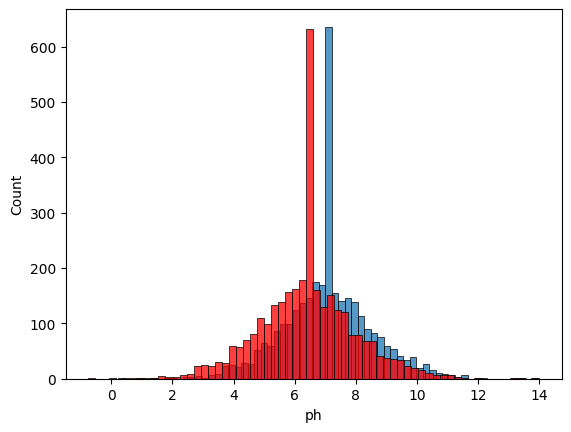

In [10]:
sns.histplot(water["ph"])

water["ph"], fitted_lambda= scipy.stats.boxcox(water["ph"])

sns.histplot(water["ph"], color="Red");

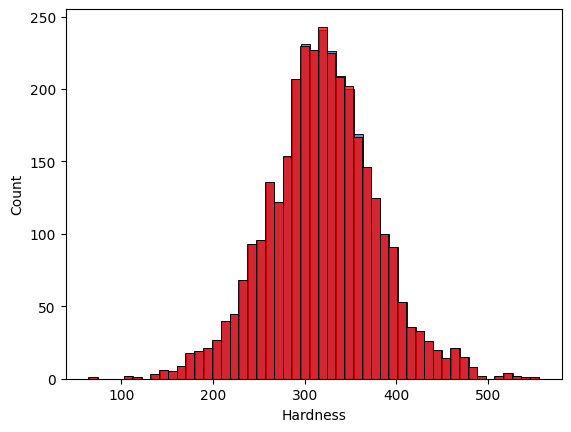

In [25]:
sns.histplot(water["Hardness"])

water["Hardness"], fitted_lambda= scipy.stats.boxcox(water["Hardness"])

sns.histplot(water["Hardness"], color="Red");

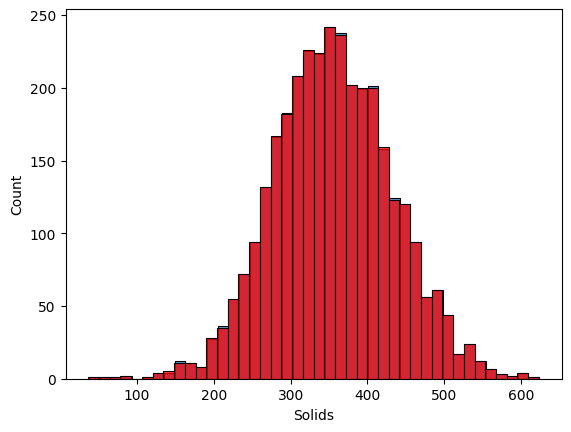

In [26]:
sns.histplot(water["Solids"])

water["Solids"], fitted_lambda= scipy.stats.boxcox(water["Solids"])

sns.histplot(water["Solids"], color="Red");

ValueError: Data must be positive.

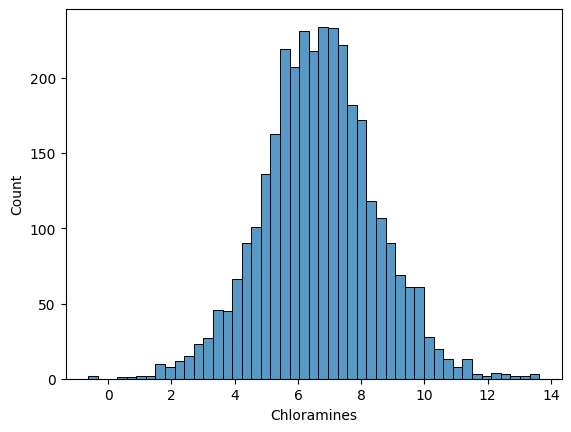

In [27]:
sns.histplot(water["Chloramines"])

water["Chloramines"], fitted_lambda= scipy.stats.boxcox(water["Chloramines"])

sns.histplot(water["Chloramines"], color="Red");

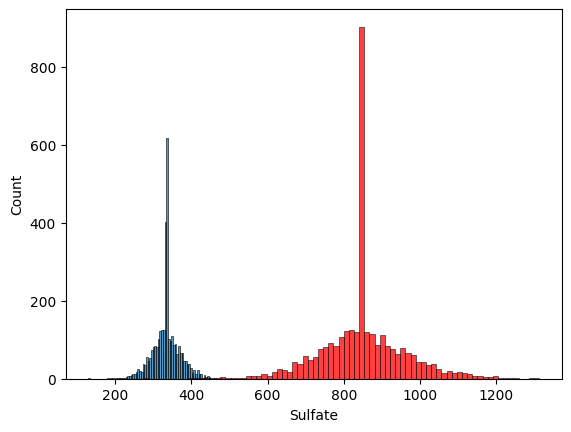

In [ ]:
sns.histplot(water["Sulfate"])

water["Sulfate"], fitted_lambda= scipy.stats.boxcox(water["Sulfate"])

sns.histplot(water["Sulfate"], color="Red");

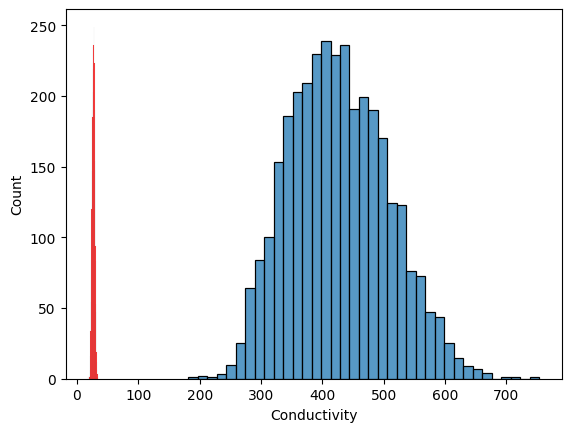

In [ ]:
sns.histplot(water["Conductivity"])

water["Conductivity"], fitted_lambda= scipy.stats.boxcox(water["Conductivity"])

sns.histplot(water["Conductivity"], color="Red");

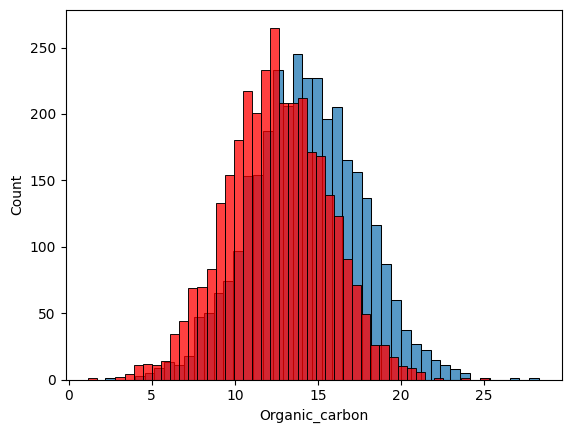

In [ ]:
sns.histplot(water["Organic_carbon"])

water["Organic_carbon"], fitted_lambda= scipy.stats.boxcox(water["Organic_carbon"])

sns.histplot(water["Organic_carbon"], color="Red");

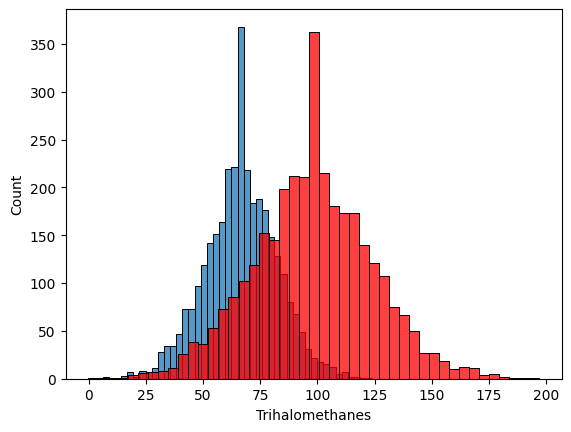

In [ ]:
sns.histplot(water["Trihalomethanes"])

water["Trihalomethanes"], fitted_lambda= scipy.stats.boxcox(water["Trihalomethanes"])

sns.histplot(water["Trihalomethanes"], color="Red");

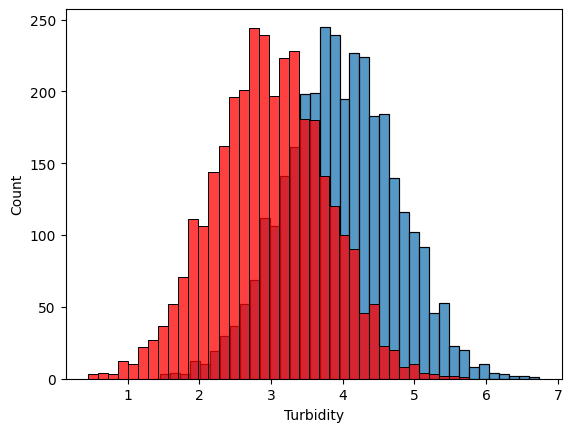

In [ ]:
sns.histplot(water["Turbidity"])

water["Turbidity"], fitted_lambda= scipy.stats.boxcox(water["Turbidity"])

sns.histplot(water["Turbidity"], color="Red");

Correlation study about the data

<Axes: >

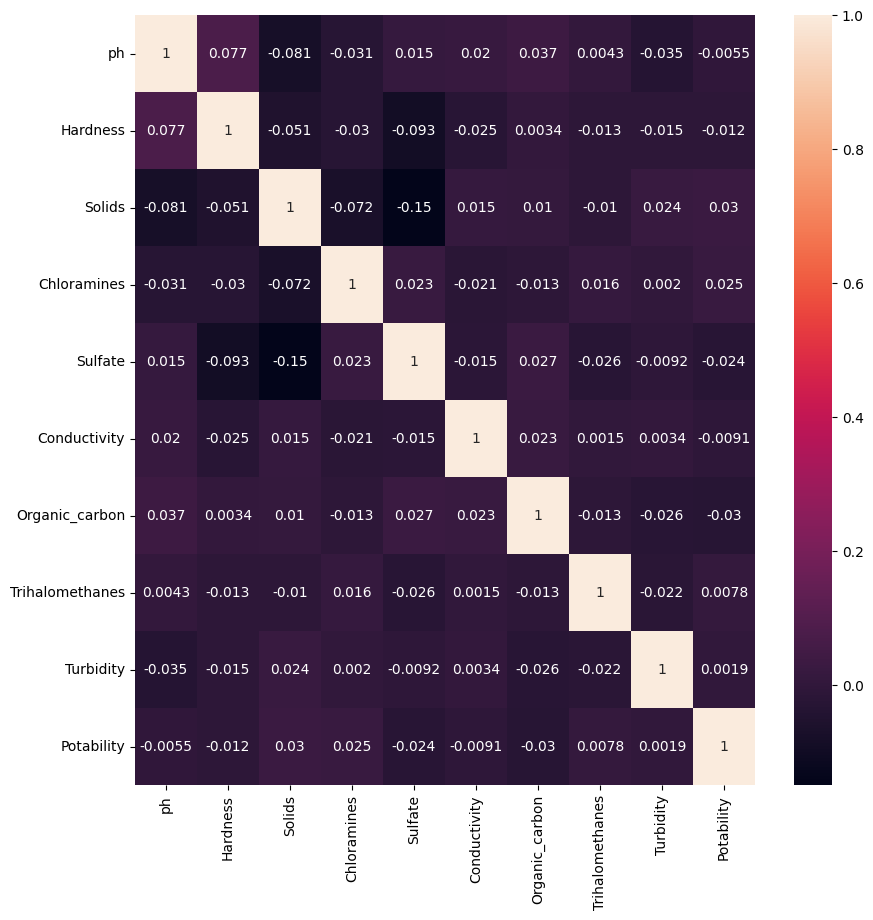

In [ ]:
matrix_cor = water.corr()
ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix_cor, annot=True)

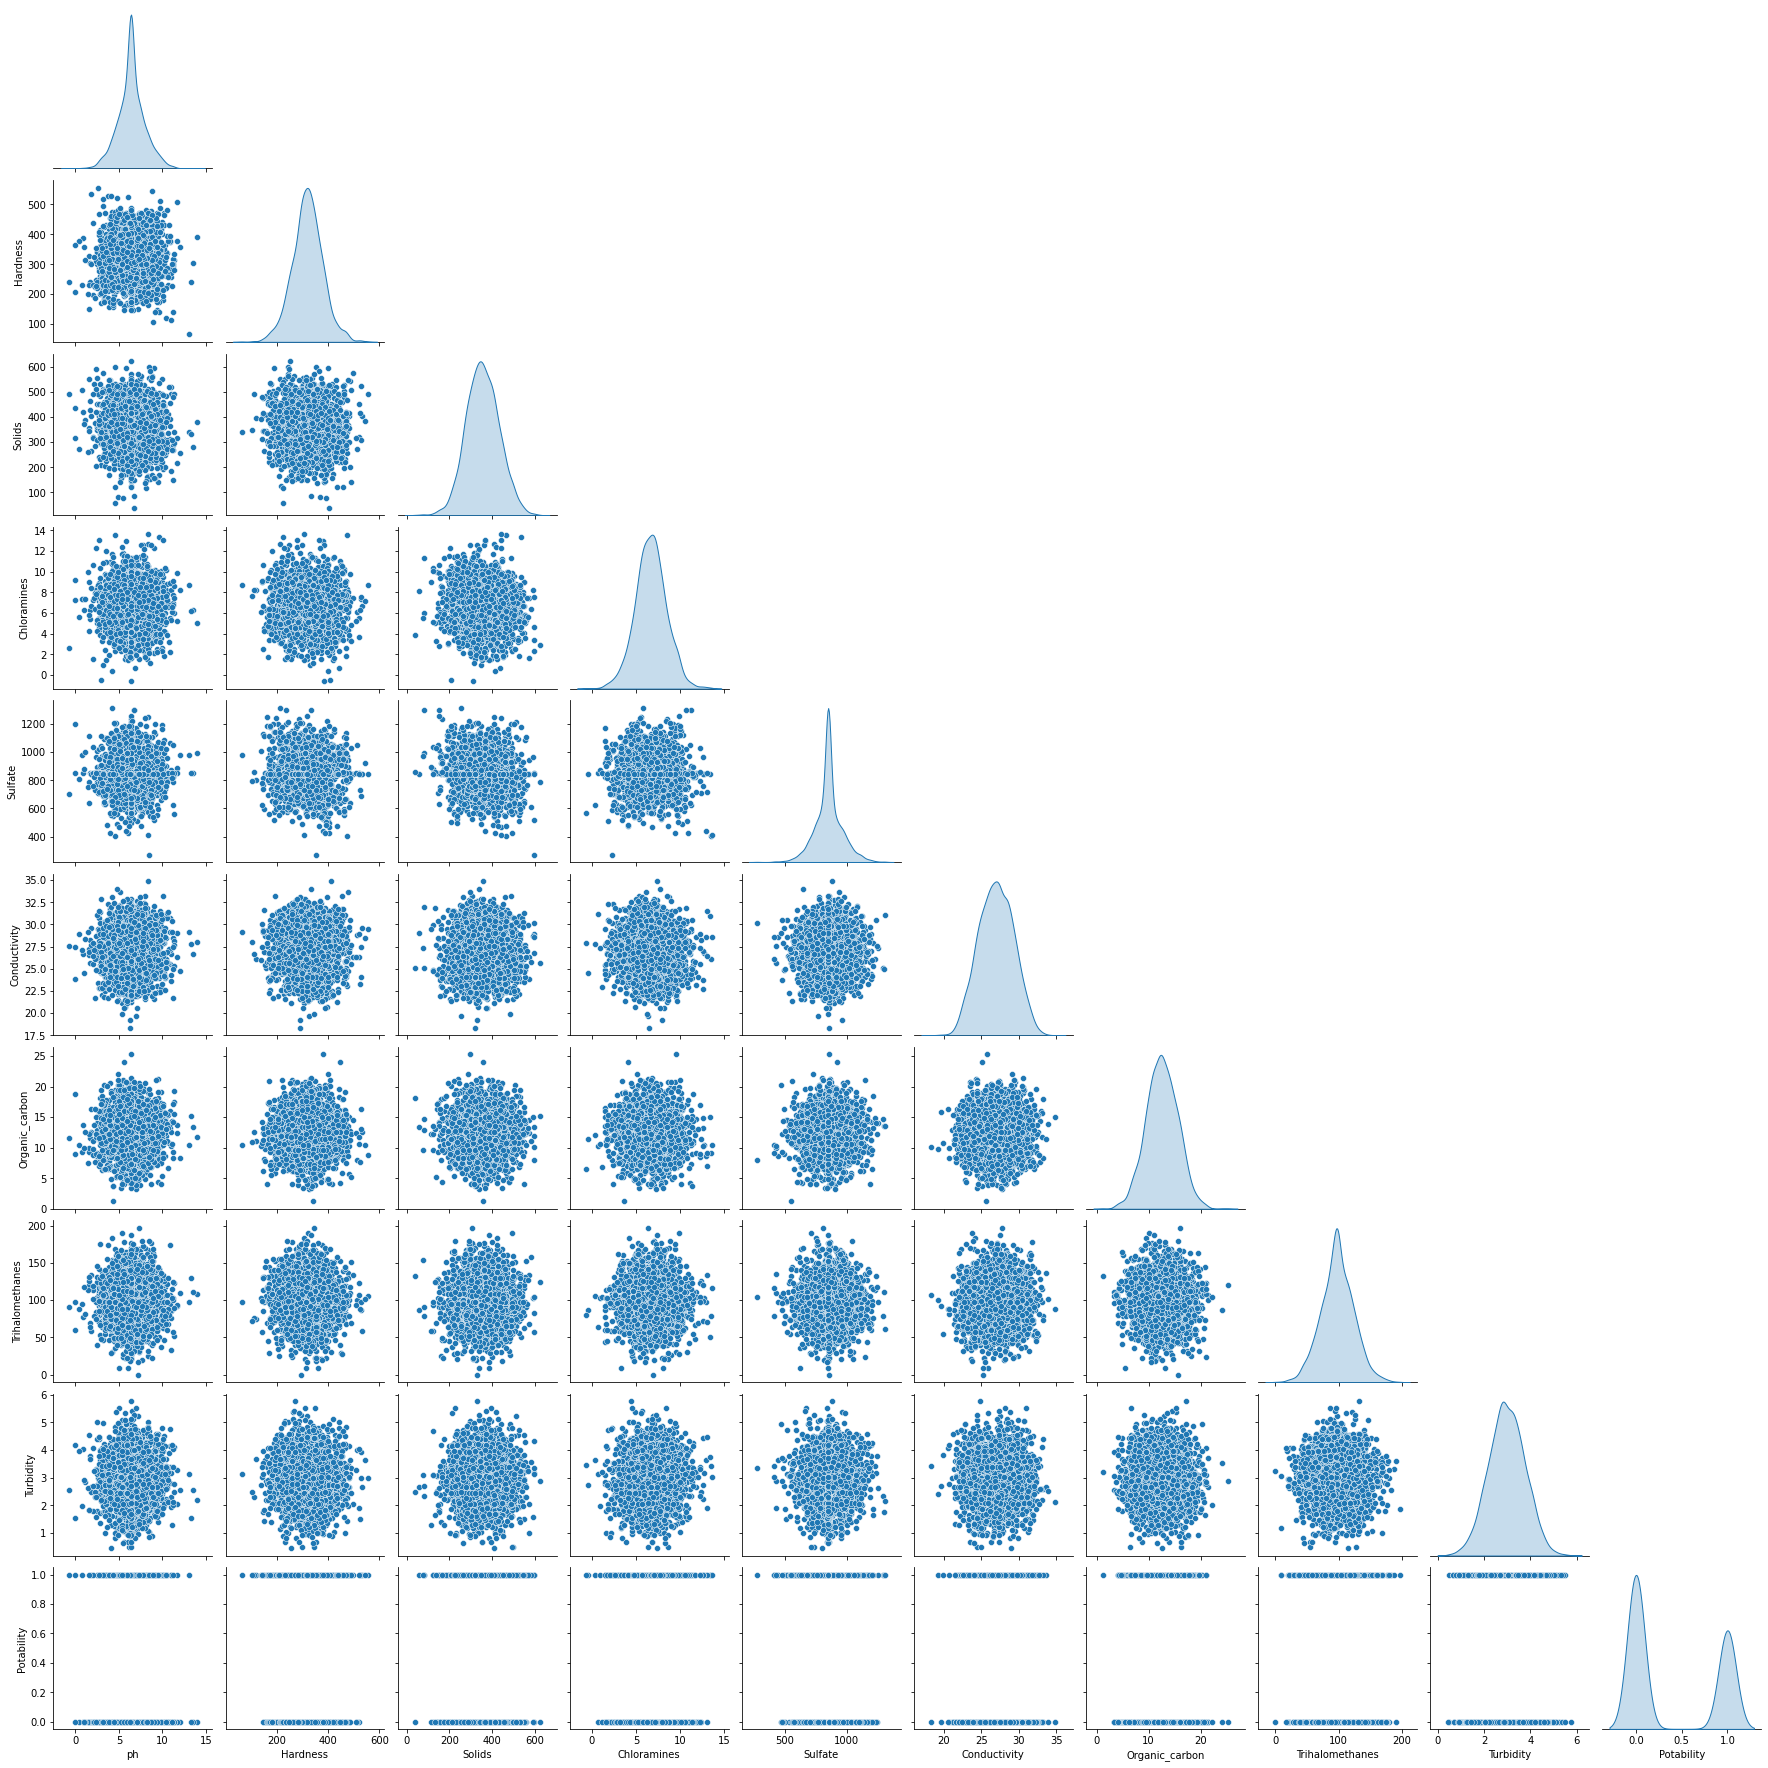

In [ ]:
sns.pairplot(water, diag_kind = "kde", corner = True);

## 2.2 - Model Building

Creating the X and y dataframes that will be fitted in the models

In [ ]:
water_X = water.drop("Potability", axis=1)
water_y = water["Potability"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(water_X, water_y, test_size=0.2)

Creating the Logistic Regression model

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic Regresison model scoring

In [ ]:
logreg.score(X_test, y_test)

0.6229007633587786

In [28]:
logreg_preds = logreg.predict(X_test)

In [29]:
print(classification_report(y_test, logreg_preds))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       408
           1       0.00      0.00      0.00       247

    accuracy                           0.62       655
   macro avg       0.31      0.50      0.38       655
weighted avg       0.39      0.62      0.48       655



c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [31]:
y_score_logreg = logreg.predict_proba(X_test)[:,1]

In [37]:
false_positive_rate_logreg, true_positive_rate_logreg, threshold_logreg = roc_curve(y_test, y_score_logreg)

In [38]:
 print("roc_auc_score for Logistic Regression: ", roc_auc_score(y_test, y_score_logreg))

roc_auc_score for Logistic Regression:  0.49248829086290385


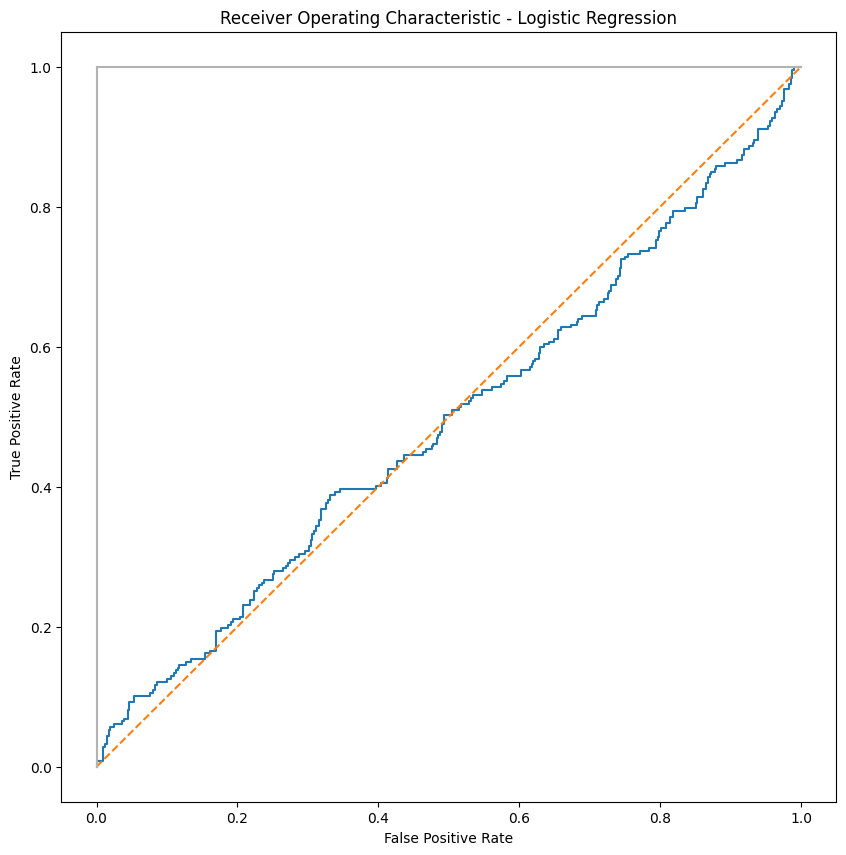

In [39]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Creating the Decision Tree Classifier model

In [40]:
dectree = DecisionTreeClassifier(random_state=42)

In [41]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Classifier model scoring

In [42]:
dectree.score(X_test, y_test)

0.7389312977099237

In [43]:
logreg_dectree = dectree.predict(X_test)

In [44]:
print(classification_report(y_test, logreg_dectree))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       408
           1       0.66      0.65      0.65       247

    accuracy                           0.74       655
   macro avg       0.72      0.72      0.72       655
weighted avg       0.74      0.74      0.74       655



In [46]:
y_score_dectree = dectree.predict_proba(X_test)[:,1]

In [47]:
false_positive_rate_dectree, true_positive_rate_dectree, threshold_dectree = roc_curve(y_test, y_score_dectree)

In [48]:
 print("roc_auc_score for DecisionTree: ", roc_auc_score(y_test, y_score_dectree))

roc_auc_score for DecisionTree:  0.7209454632055251


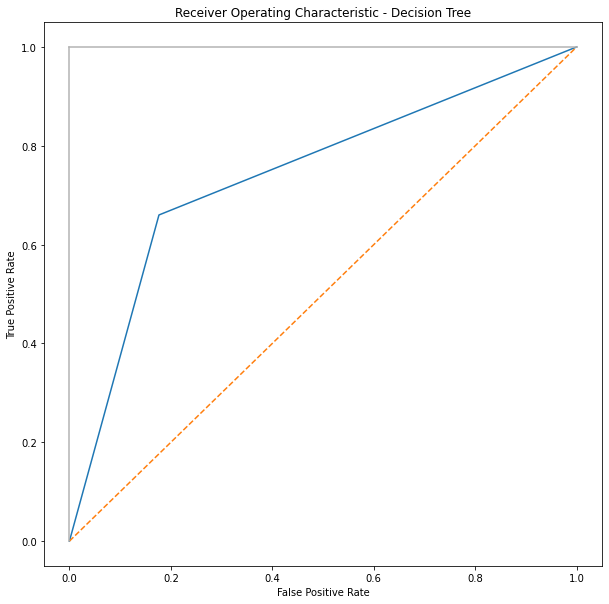

In [42]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate_dectree, true_positive_rate_dectree)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Creating the Random Forest Classifier model

In [49]:
random = RandomForestClassifier(max_depth=14,
                                n_estimators=600,
                                n_jobs=-1)

Note: The Random Forest parameters were optimized by using GridSearchCV. This process is not found on this notebook.

In [50]:
random.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=600, n_jobs=-1)

Random Forest Classifier model scoring

In [51]:
random.score(X_test, y_test)

0.8030534351145038

In [52]:
logreg_random = random.predict(X_test)

In [53]:
print(classification_report(y_test, logreg_random))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       408
           1       0.81      0.63      0.71       247

    accuracy                           0.80       655
   macro avg       0.80      0.77      0.78       655
weighted avg       0.80      0.80      0.80       655



In [54]:
y_score_random = random.predict_proba(X_test)[:,1]

In [55]:
false_positive_rate_random, true_positive_rate_random, threshold_random = roc_curve(y_test, y_score_random)

In [56]:
 print("roc_auc_score for RandomForestClassifier: ", roc_auc_score(y_test, y_score_random))

roc_auc_score for RandomForestClassifier:  0.8678752877669287


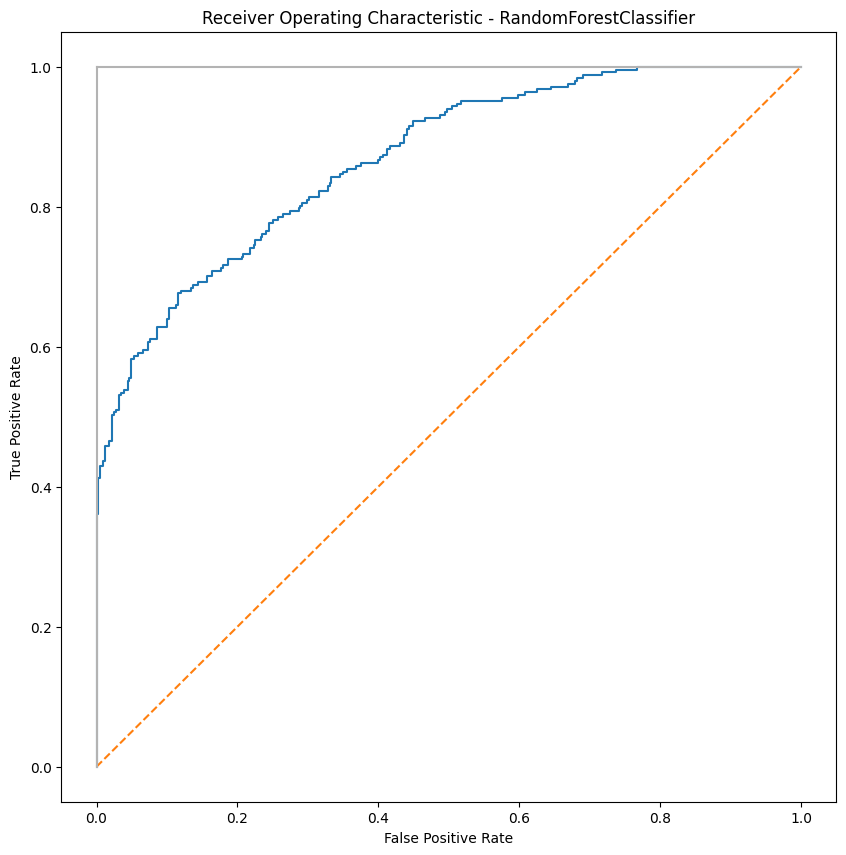

In [57]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_random, true_positive_rate_random)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest model feature importance analysis

In [58]:
importance = random.feature_importances_

In [59]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.19355
Feature: 1, Score: 0.08461
Feature: 2, Score: 0.07796
Feature: 3, Score: 0.08430
Feature: 4, Score: 0.30284
Feature: 5, Score: 0.06591
Feature: 6, Score: 0.06149
Feature: 7, Score: 0.06809
Feature: 8, Score: 0.06124


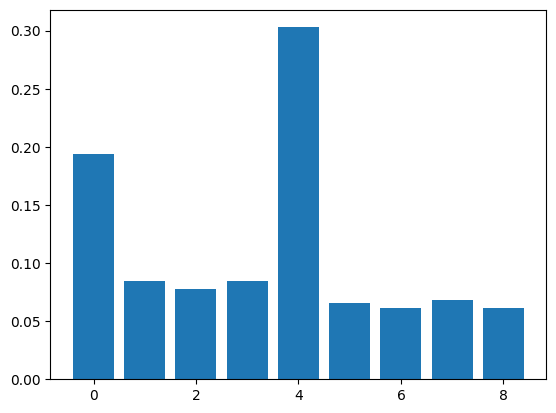

In [60]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [61]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.394514,333.713359,351.888857,6.858024,955.479185,30.694168,8.922352,132.110660,1.967306,0
1,2.801019,199.390995,331.988818,6.104153,851.495400,31.376387,13.352450,80.834577,3.511521,0
2,7.490659,369.159261,343.894185,9.122835,851.495400,26.853022,14.899502,97.409151,2.060444,0
3,7.726706,351.043182,362.751563,7.724067,919.644429,25.188719,16.331552,155.186565,3.640282,0
4,8.569639,290.645633,325.781872,6.004013,777.905583,26.261545,10.015043,42.473146,3.083881,0


Plotting the Receiver Operating Characteristic curve for the three models

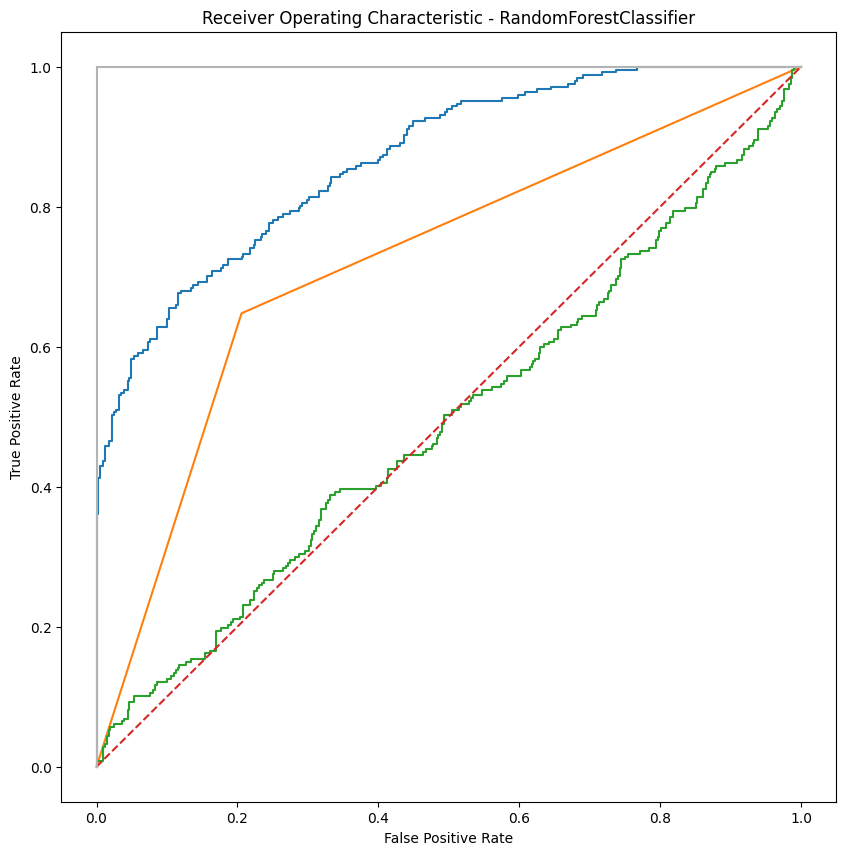

In [62]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForestClassifier')
plt.plot(false_positive_rate_random, true_positive_rate_random)
plt.plot(false_positive_rate_dectree, true_positive_rate_dectree)
plt.plot(false_positive_rate_logreg, true_positive_rate_logreg)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
import joblib

# Save the best model (Random Forest)
joblib.dump(random, 'best_model.pkl')

# Save the boxcox lambda values for preprocessing
# We need to collect the lambda values used for each feature
# From the code, fitted_lambda is overwritten each time, but we can recalculate or save them

# For inference, we need the lambdas for each feature
# Let's define the features that were transformed
features_to_transform = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Calculate lambdas from the original data (before transformation, but since it's transformed in place, we need original)
# Actually, since the data is transformed in place, we can't get original lambdas easily.
# But for inference, we can save the lambdas by re-calculating on the training data or something.

# To make it simple, let's save the transformed training data mean or something, but better to save lambdas.

# Since boxcox is applied, and lambda is fitted per feature, we can save a dict of lambdas.

# But in the notebook, fitted_lambda is the last one.

# To fix, let's add code to save lambdas.

# For now, since it's complex, perhaps save the model and for inference, assume the data is preprocessed.

# But to do properly, let's add code to save lambdas.

# First, we need to get the lambdas.

# Since the data is already transformed, we can't get lambda from transformed data.

# We need to load original data and calculate.

# But to simplify, perhaps the user doesn't mean encodings for categorical, since there are none.

# Perhaps "encodings" is a misnomer, and they mean the model and preprocessing.

# For now, let's save the model.

joblib.dump(random, 'best_model.pkl')

print("Model saved as best_model.pkl")

Model saved as best_model.pkl


In [64]:
# Load original data to calculate lambdas
original_water = pd.read_csv("./water_potability.csv")

# Fill nulls as in preprocessing
original_water['ph']=original_water['ph'].fillna(original_water.groupby(['Potability'])['ph'].transform('mean'))
original_water['Sulfate']=original_water['Sulfate'].fillna(original_water.groupby(['Potability'])['Sulfate'].transform('mean'))
original_water['Trihalomethanes']=original_water['Trihalomethanes'].fillna(original_water.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

# Remove ph <=0
original_water = original_water[original_water["ph"] > 0]

# Calculate lambdas for each feature
lambdas = {}
features_to_transform = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for feature in features_to_transform:
    _, lambda_val = scipy.stats.boxcox(original_water[feature])
    lambdas[feature] = lambda_val

# Save lambdas
joblib.dump(lambdas, 'boxcox_lambdas.pkl')

print("Lambdas saved as boxcox_lambdas.pkl")

Lambdas saved as boxcox_lambdas.pkl
